<a href="https://colab.research.google.com/github/HsnTmjd/ML-projects/blob/main/Autism_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV  # can also use randomSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [2]:
!pip install scikit-learn==1.0.2

We've imported SMOTE for the class imbalance that we would see in the given dataset

 The cross_val_score function in machine learning, typically from libraries like scikit-learn, is used to evaluate the performance of a machine learning model using cross-validation. It provides a more robust estimate of a model's generalization ability than a simple train-test split.
  Trying to make a more relyable accuracy score

  We're using randomiz searchCV to perform hyper parameter tuning on the three different models that we'll work on.
        _ in our case decisiontreeclassifier, randomforesrclassifier, xgbclassifier

   




In [3]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [4]:
# display all the columns of the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

The first problem we can see is in the ethnicity column there is '?' when the data isn't available

In [5]:
# We don't want to see the age as float
df['age'] = df['age'].astype(int)
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [6]:
for col in df.columns:
  numerical_features = ['ID', 'age', 'result']      # id, age, result are the only numerical values
  if col not in numerical_features:
    print(f'{col}: {df[col].unique()}')
    print('--'*20)

A1_Score: [1 0]
----------------------------------------
A2_Score: [0 1]
----------------------------------------
A3_Score: [1 0]
----------------------------------------
A4_Score: [0 1]
----------------------------------------
A5_Score: [1 0]
----------------------------------------
A6_Score: [0 1]
----------------------------------------
A7_Score: [1 0]
----------------------------------------
A8_Score: [0 1]
----------------------------------------
A9_Score: [1 0]
----------------------------------------
A10_Score: [1 0]
----------------------------------------
gender: ['f' 'm']
----------------------------------------
ethnicity: ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
----------------------------------------
jaundice: ['no' 'yes']
----------------------------------------
austim: ['no' 'yes']
----------------------------------------
contry_of_res: ['Austria' 'India' 'United States' 'South Afri

In [7]:
# id and the age desc columns are not useful
df.drop(columns=['ID', 'age_desc'], inplace=True)

In [8]:
# defining the mapping dictionary with the country names
country_mapping = {
    'Viet Nam': 'Vietnam',
    'AmericanSamoa' : "United States",
    'Hong Kong' : 'China',
}
# replacing the value in the country column
df['contry_of_res'] = df['contry_of_res'].replace(country_mapping)


In [ ]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [ ]:
# let's see what is the ratio of the autism and the non-autism
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


We can see that the ratio is almost 1:6.
So if we put this data into a classification model then the model won't be able to identify it correctly.
  It'll always say that the person doesn't have autism

Oversampling is a technique used in machine learning to address the issue of class imbalance in datasets. Class imbalance occurs when the number of samples in one class is significantly higher than in another. This can cause machine learning models to favor the majority class, leading to biased predictions.

We'll now perform oversampling using SMOTE

We'll now perform EDA

In [ ]:
print(df.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')


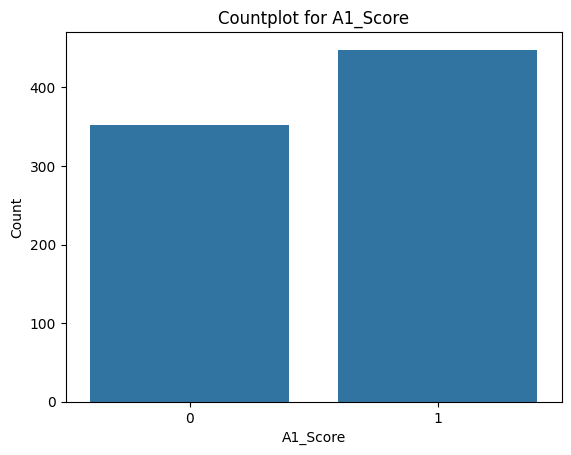

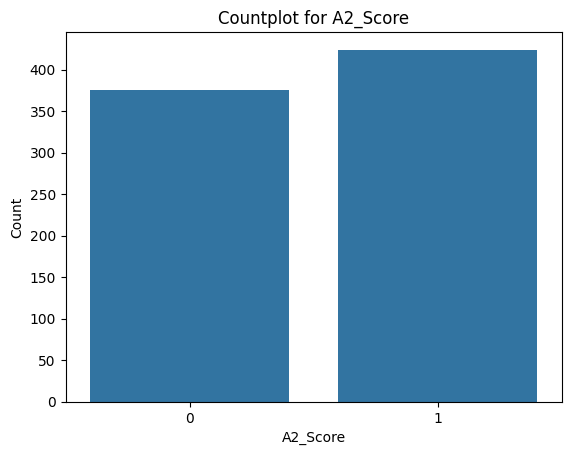

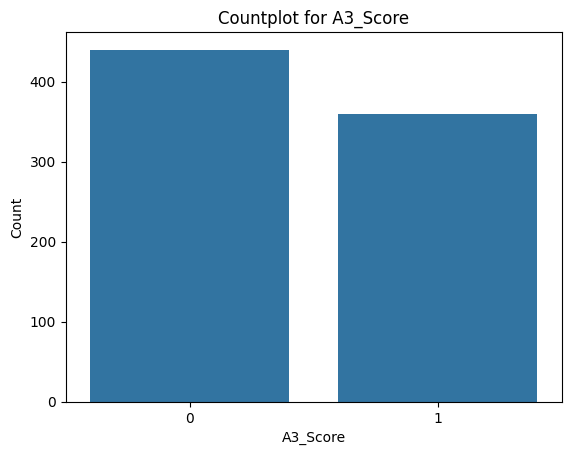

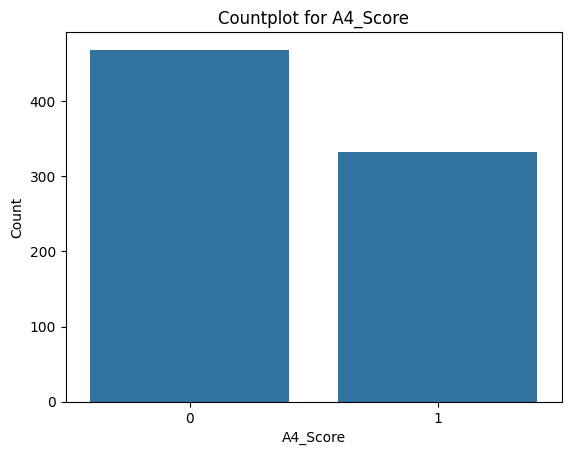

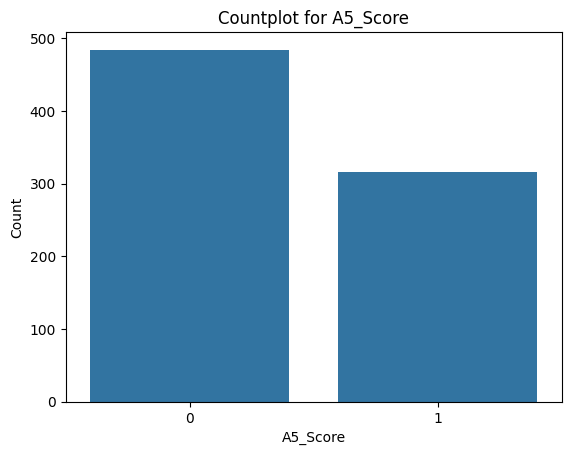

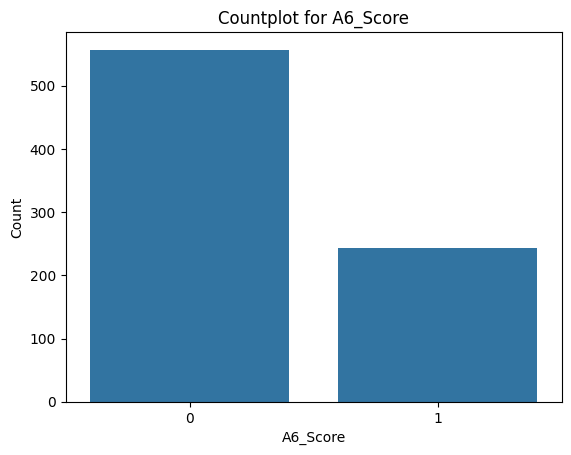

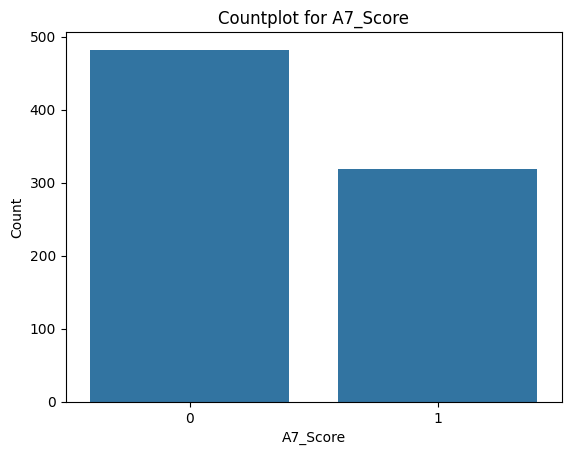

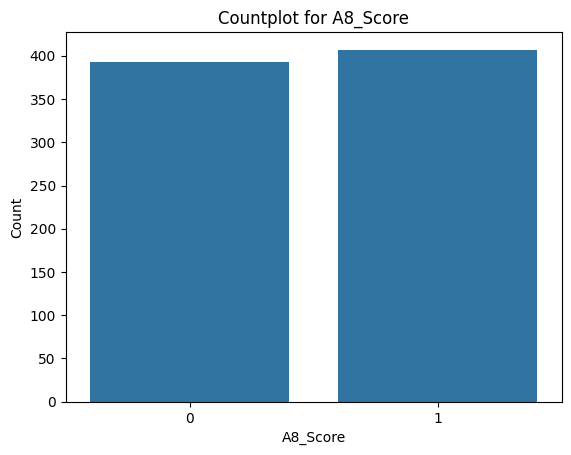

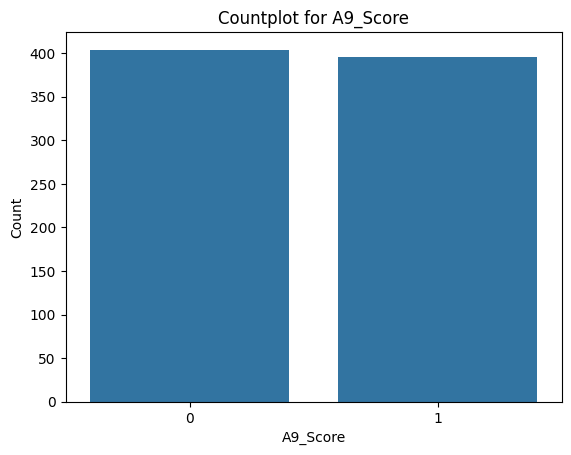

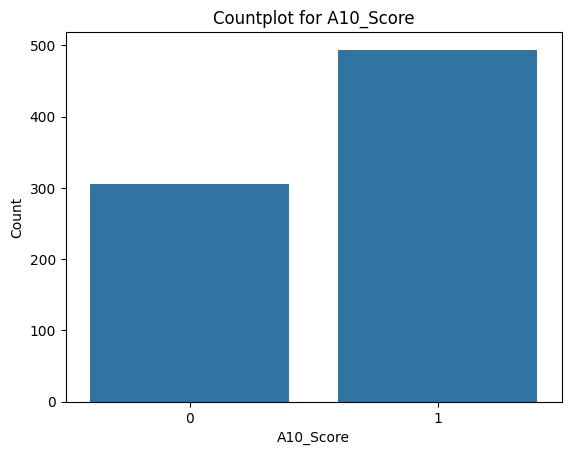

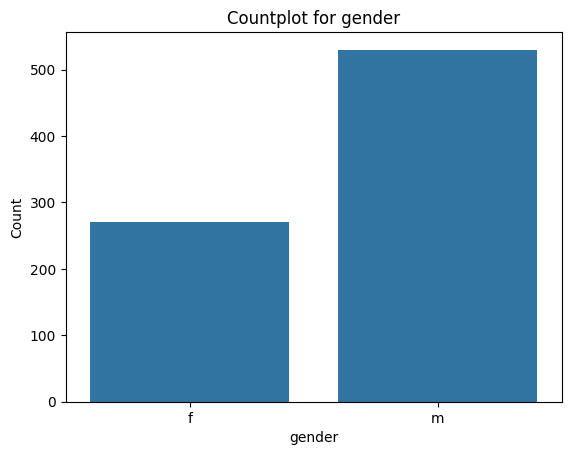

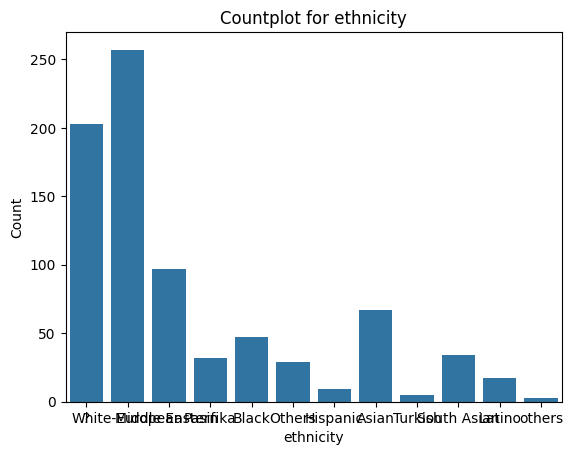

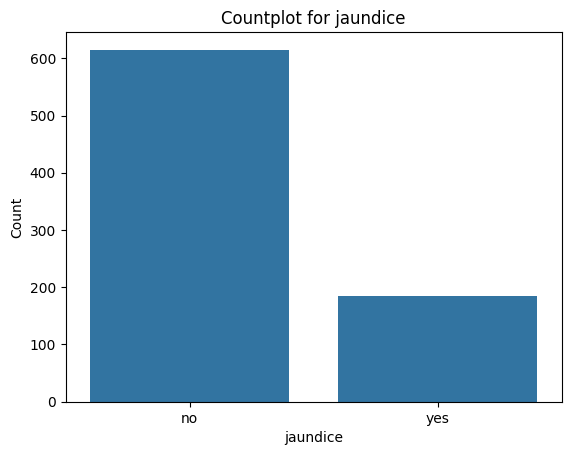

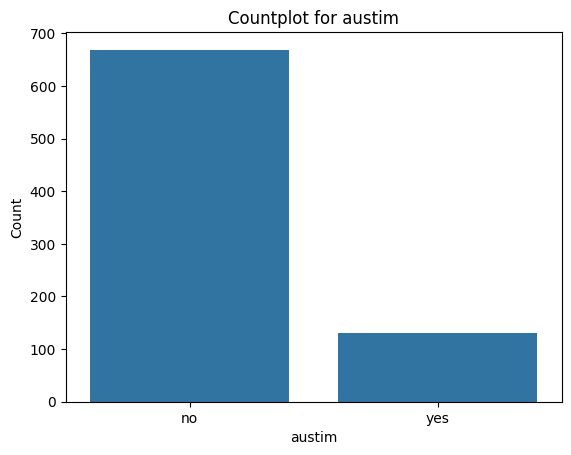

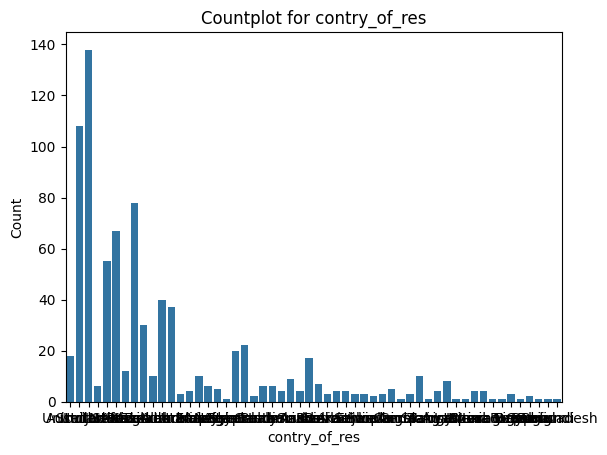

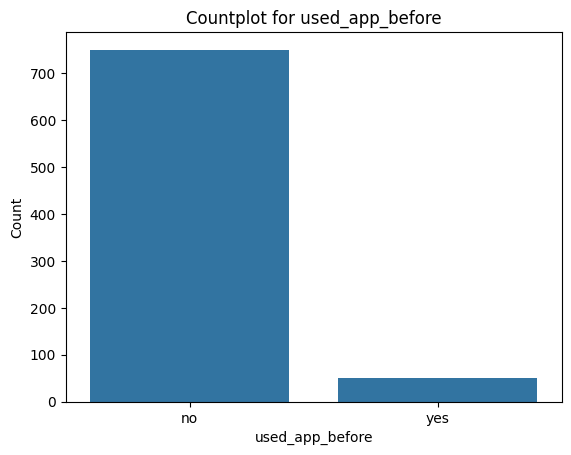

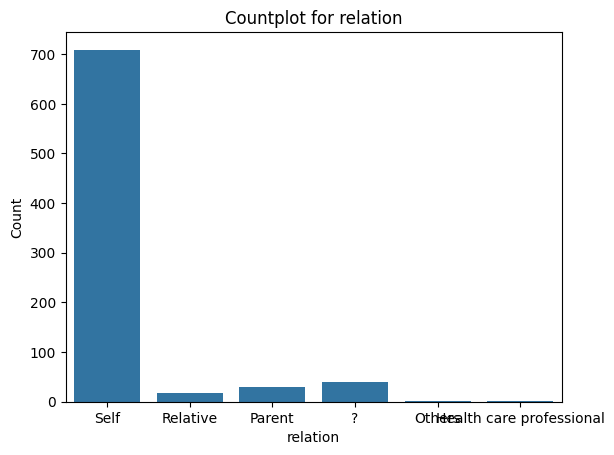

In [9]:
# let's make a list of the catagorical columns
catagoorical_column = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation',]
for col in catagoorical_column:
  sns.countplot(x=df[col])
  plt.title(f"Countplot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

There are two 'others' in the ethnicity, one the upper case and the other is the lower case. and there is the '?' mark


We can put all these things in just one catagory

same case can go for the relation column too

one for the 'self' and the rest will be put in the 'other'

In [10]:
# handling the missing data
df['ethnicity'] = df['ethnicity'].replace({'?':'others', 'Others': 'others'})

In [11]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [12]:
df['relation'] = df['relation'].replace({
    '?':'Others',
    'Relative': "Others",
    'Parent' : "Others",
     'Health care professional': 'Others'
})

In [ ]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [ ]:
df['relation'].value_counts()

,count
relation,
Self,709
Others,91


In [13]:
# identifying columns with object datatype
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [14]:
# creating a dicctionary to store the encoders
encoders = {}

# applying lebel encoding and store the encoders
for col in object_columns:
  encoder = LabelEncoder()
  df[col] = encoder.fit_transform(df[col])
  encoders[col] = encoder

# save the encoders as a pickle file
with open('encoders.pkl', 'wb') as f:
  pickle.dump(encoders, f)

In [ ]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [ ]:
# seeing how the dataset looks like when the objects are encoded
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,9,0,0,6,0,6.351166,5,0
1,0,0,0,0,0,0,0,0,0,0,47,1,9,0,0,23,0,2.255185,5,0
2,1,1,1,1,1,1,1,1,1,1,7,1,8,0,1,52,0,14.851484,5,1
3,0,0,0,0,0,0,0,0,0,0,23,0,9,0,0,52,0,2.276617,5,0
4,0,0,0,0,0,0,0,0,0,0,43,1,9,0,0,44,0,-4.777286,5,0


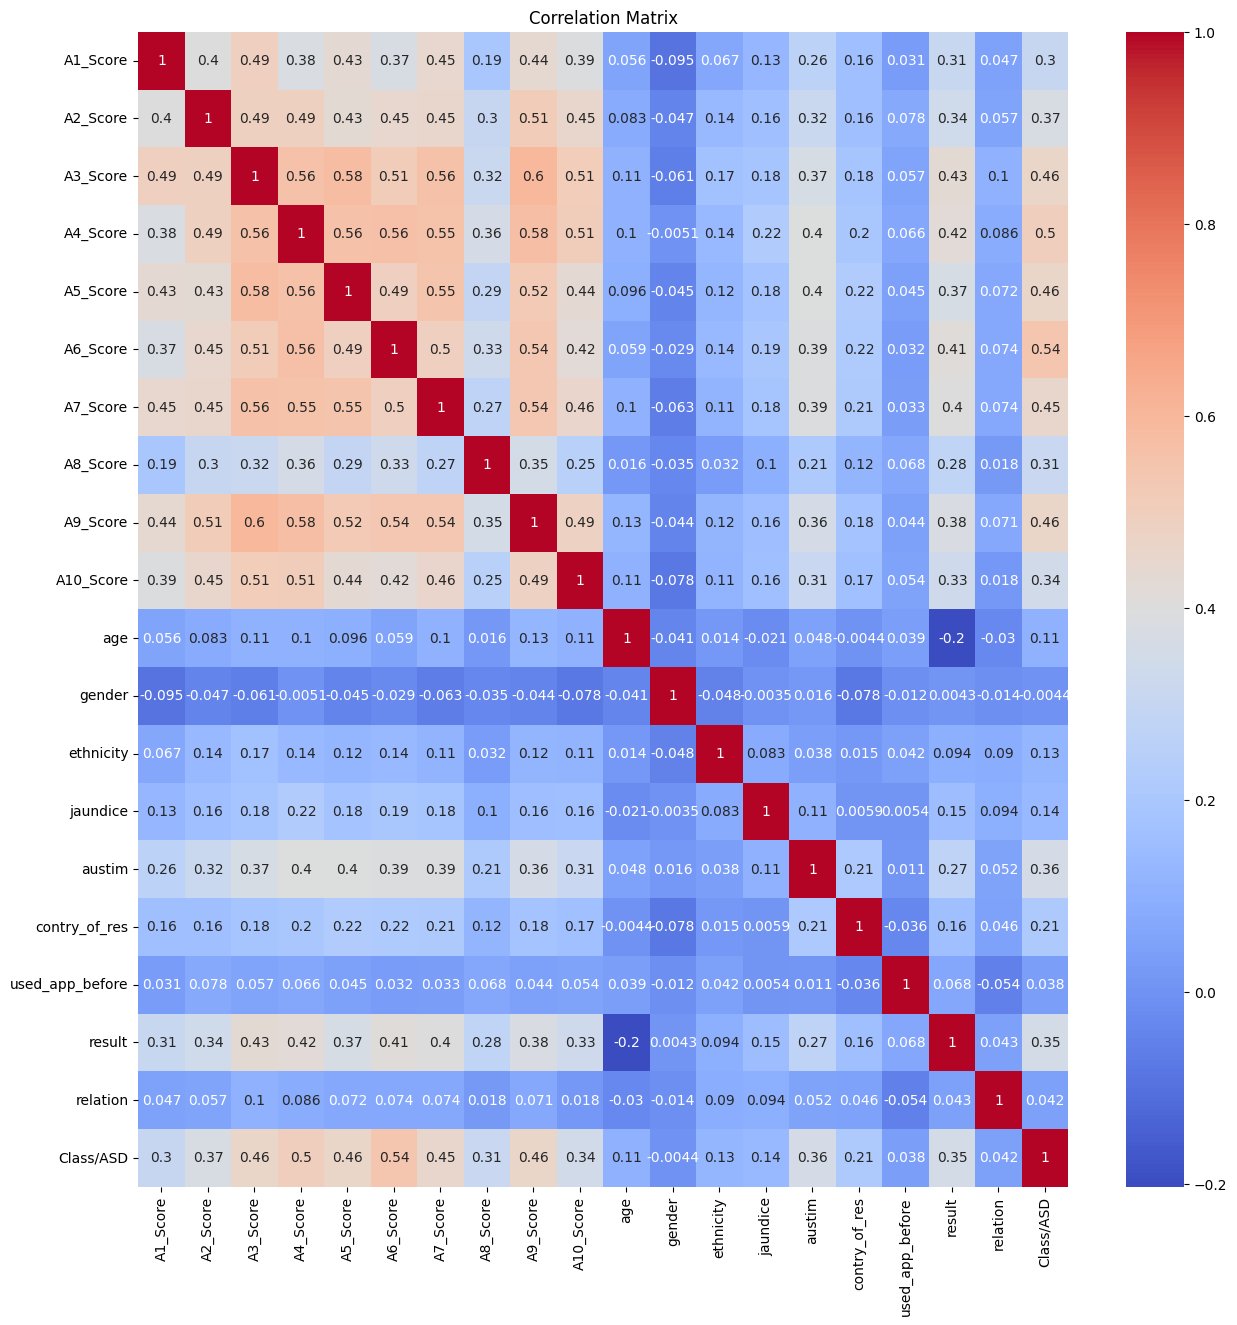

In [15]:
# correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Insights from EDA:


*   There is class imblalance in the catagorical features

*   Don't have any highly correlated column





In [16]:
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

In [ ]:
print(X.shape)

(800, 19)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [ ]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [ ]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


We can see that there is a huge imbalance and we can't model with this huge imbalance

**SMOTE (Synthetic Minority Oversampling technique)**

In [ ]:
# We are going to take the train data to perform the oversampling
# in case of under sampling we take between the 125 and 525 ....the 125 from the 525.....then we have equal number of the 0 and 1


In [18]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [19]:
print(y_train_resampled)

0       1
1       0
2       0
3       0
4       0
       ..
1025    1
1026    1
1027    1
1028    1
1029    1
Name: Class/ASD, Length: 1030, dtype: int64


In [ ]:
y_train_resampled.value_counts()

,count
Class/ASD,
1,515
0,515




> Model Training



In [20]:
# dictionary of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    'logistic_reg' : LogisticRegression(max_iter=1000, random_state=42)
}

In [ ]:
print(models)

{'Decision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...), 'logistic_reg': LogisticRegression(max_iter=1000, random_state=42)}


In [21]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
  print("-"*50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.86
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.91
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.91
--------------------------------------------------
Training logistic_reg with default parameters...
logistic_reg Cross-Validation Accuracy: 0.83
--------------------------------------------------


In [ ]:
cv_scores

{'Decision Tree': array([0.75728155, 0.86407767, 0.90291262, 0.87864078, 0.88349515]),
 'Random Forest': array([0.86407767, 0.95145631, 0.90291262, 0.90776699, 0.91262136]),
 'XGBoost': array([0.8592233 , 0.92718447, 0.90291262, 0.91747573, 0.9223301 ]),
 'logistic_reg': array([0.78640777, 0.8592233 , 0.81553398, 0.84466019, 0.82524272])}

In [25]:
# Hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

param_grid_logreg = {
    "penalty": ["l2", "none"],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["lbfgs", "liblinear", "saga"]
}

In [26]:
# hyperparameter tunig for 3 tree based models

# the below steps can be automated by using a for loop or by using a pipeline

# perform RandomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=models["Decision Tree"], param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=models["Random Forest"], param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=models["XGBoost"], param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_logreg = RandomizedSearchCV(estimator=models["logistic_reg"], param_distributions=param_grid_logreg, n_iter=20, cv=5, scoring="accuracy", random_state=42)

In [27]:
# fit the models
random_search_dt.fit(X_train_resampled, y_train_resampled)
random_search_rf.fit(X_train_resampled, y_train_resampled)
random_search_xgb.fit(X_train_resampled, y_train_resampled)
random_search_logreg.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will igno

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=20,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l2', 'none'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [28]:
# Get the model with best score

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_

if random_search_logreg.best_score_ > best_score:
  best_model = random_search_logreg.best_estimator_
  best_score = random_search_logreg.best_score_

In [29]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
Best Cross-Validation Accuracy: 0.92


In [30]:
# Perform GridSearchCV for each model
grid_search_dt = GridSearchCV(estimator=models["Decision Tree"], param_grid=param_grid_dt, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rf = GridSearchCV(estimator=models["Random Forest"], param_grid=param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_xgb = GridSearchCV(estimator=models["XGBoost"], param_grid=param_grid_xgb, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_logreg = GridSearchCV(estimator=models["logistic_reg"], param_grid=param_grid_logreg, cv=5, scoring="accuracy", n_jobs=-1)

In [31]:
# Fit the GridSearchCV objects
print("Tuning Decision Tree...")
grid_search_dt.fit(X_train_resampled, y_train_resampled)
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best accuracy for Decision Tree: {grid_search_dt.best_score_:.2f}")
print("="*50)

print("Tuning Random Forest...")
grid_search_rf.fit(X_train_resampled, y_train_resampled)
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best accuracy for Random Forest: {grid_search_rf.best_score_:.2f}")
print("="*50)

print("Tuning XGBoost...")
grid_search_xgb.fit(X_train_resampled, y_train_resampled)
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best accuracy for XGBoost: {grid_search_xgb.best_score_:.2f}")
print("="*50)

print("Tuning Logistic Regression...")
grid_search_logreg.fit(X_train_resampled, y_train_resampled)
print(f"Best parameters for Logistic Regression: {grid_search_logreg.best_params_}")


Tuning Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy for Decision Tree: 0.86
Tuning Random Forest...
Best parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy for Random Forest: 0.92
Tuning XGBoost...
Best parameters for XGBoost: {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Best accuracy for XGBoost: 0.91
Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' 

In [32]:
# save the best model
with open("best_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

In [33]:
# evaluate on test data
y_test_pred = best_model.predict(X_test)
print("Accuracy score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy score:
 0.8125
Confusion Matrix:
 [[110  14]
 [ 16  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       124
           1       0.59      0.56      0.57        36

    accuracy                           0.81       160
   macro avg       0.73      0.72      0.73       160
weighted avg       0.81      0.81      0.81       160

